<a href="https://colab.research.google.com/github/PritishRane/Deep-Learning/blob/main/Cnn_new_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image  import ImageDataGenerator


## **Custom Model**

 Data Loading and Augmentation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train='/content/drive/My Drive/Micro_Organism'
test= '/content/drive/My Drive/test'

In [5]:
img_width, img_height = 64, 64
batch_size = 32

In [6]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1.0/255)

In [7]:
train_data = train_datagen.flow_from_directory(
    train,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 789 images belonging to 8 classes.
Found 26 images belonging to 8 classes.


creating the model

In [8]:
custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])



compile the model


In [9]:
custom_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

train the model

In [10]:
history = custom_model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 283s 8s/step - accuracy: 0.1596 - loss: 2.0979 - val_accuracy: 0.2308 - val_loss: 2.0070
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 261ms/step - accuracy: 0.2565 - loss: 1.9534 - val_accuracy: 0.3462 - val_loss: 1.9021
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.2872 - loss: 1.9044 - val_accuracy: 0.3846 - val_loss: 1.8290
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.3180 - loss: 1.8429 - val_accuracy: 0.1923 - val_loss: 1.7647
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.2762 - loss: 1.8787 - val_accuracy: 0.2692 - val_loss: 1.7578
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 278ms/step - accuracy: 0.3437 - loss: 1.8214 - val_accuracy: 0.3077 - val_loss: 1.7511
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.3497 - loss: 1.7722 - val_accuracy: 0.3077 - val_loss: 1.8038
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - accuracy: 0.3459 - loss: 1.7664 - val_accura

Evaluate the Model

In [12]:
test_loss, test_acc = custom_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.2692 - loss: 1.6276
Test Accuracy: 0.27


Visualize Training Performance

In [14]:
import matplotlib.pyplot as plt

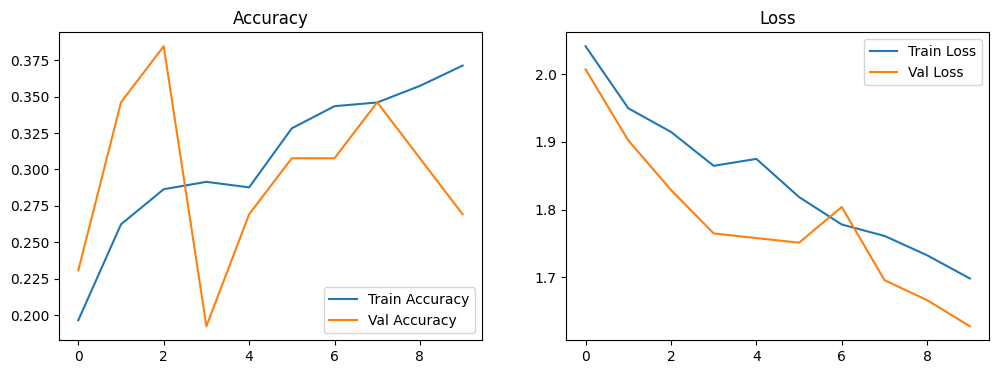

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [16]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

In [18]:
img_path='/content/Image_131.jpg'

In [19]:
img = load_img(img_path, target_size=(128, 128))  # Resize to match model input size
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [20]:
prediction = custom_model.predict(img_array)

# Output predicted probabilities for each class
print("Predicted probabilities:", prediction)

# Get the predicted class index
predicted_class = np.argmax(prediction)
print("Predicted class index:", predicted_class)

# Optional: Map the index to class names
class_names = list(train_data.class_indices.keys())
print("Predicted class name:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
Predicted probabilities: [[0.07399226 0.32755783 0.18809377 0.25600263 0.02252448 0.04333311
  0.03448052 0.05401547]]
Predicted class index: 1
Predicted class name: Euglena


Predict on the Entire Test Set

In [21]:
predictions = custom_model.predict(test_data)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_data.classes

# Map indices to class names
class_names = list(test_data.class_indices.keys())
predicted_class_names = [class_names[i] for i in predicted_classes]

print("Predicted class names:", predicted_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
Predicted class names: ['Yeast', 'Euglena', 'Paramecium', 'Euglena', 'Euglena', 'Paramecium', 'Paramecium', 'Euglena', 'Spherical_bacteria', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Hydra', 'Spherical_bacteria', 'Yeast', 'Rod_bacteria', 'Rod_bacteria', 'Spiral_bacteria', 'Rod_bacteria', 'Spherical_bacteria', 'Paramecium', 'Rod_bacteria', 'Yeast', 'Paramecium', 'Spherical_bacteria']


Visualize the Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


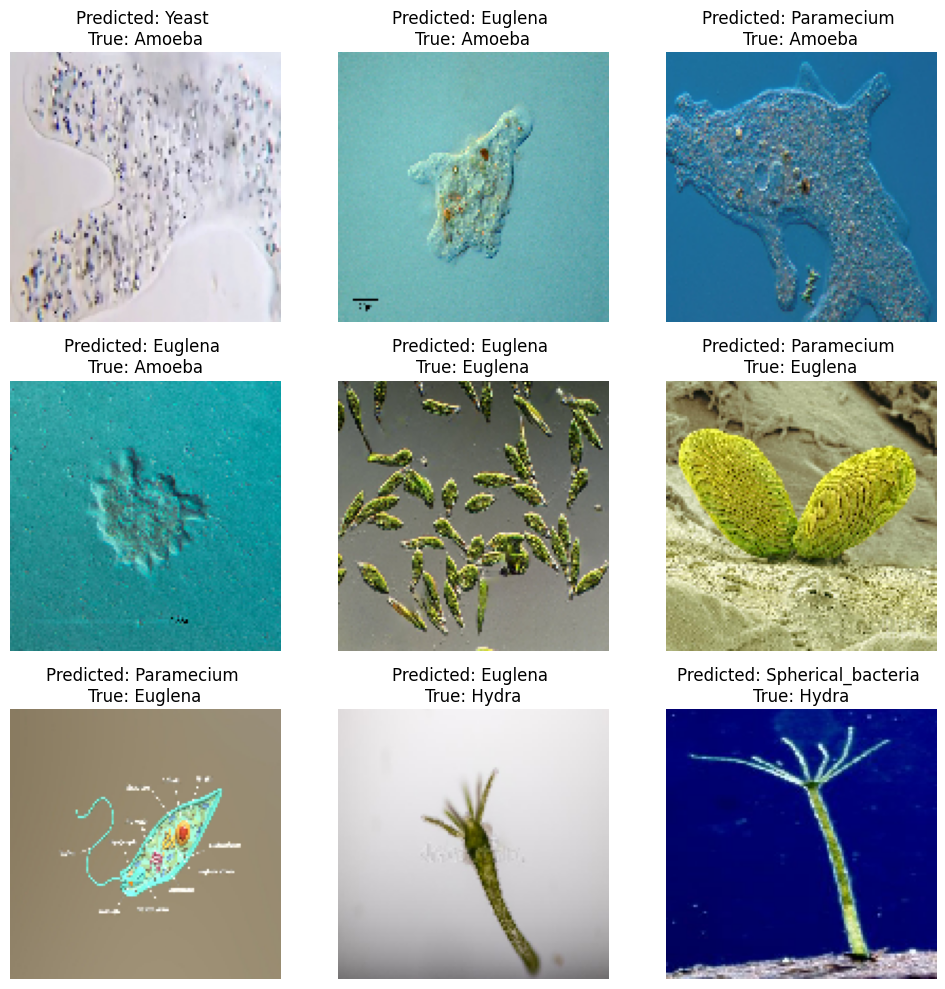

In [22]:
import matplotlib.pyplot as plt

# Get a batch of test data
test_images, test_labels = next(test_data)

# Predict on the batch
predictions = custom_model.predict(test_images)

# Plot the images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} \nTrue: {class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Create a DataFrame with predictions and true labels
results = pd.DataFrame({
    'True_Label': [class_names[i] for i in true_classes],
    'Predicted_Label': predicted_class_names
})

# Save to CSV
results.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [25]:
custom_model.save('microorganism_classifier.keras')

# **Create MobileNetV2 model **

Load Pretrained Model

In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load MobileNetV2 pretrained on ImageNet
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create the model
pretrained_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
pretrained_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Train the Pretrained Model

In [29]:
history_pretrained = pretrained_model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 669ms/step - accuracy: 0.2315 - loss: 2.3254 - val_accuracy: 0.5769 - val_loss: 1.3379
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.4675 - loss: 1.4410 - val_accuracy: 0.6923 - val_loss: 1.1260
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.5444 - loss: 1.2933 - val_accuracy: 0.6538 - val_loss: 1.0942
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.5651 - loss: 1.2296 - val_accuracy: 0.7308 - val_loss: 0.8985
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.6119 - loss: 1.0760 - val_accuracy: 0.8462 - val_loss: 0.9175
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 451ms/step - accuracy: 0.6496 - loss: 1.0324 - val_accuracy: 0.7308 - val_loss: 0.8940
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 480ms/step - accuracy: 0.6585 - loss: 1.0032 - val_accuracy: 0.8077 - val_loss: 0.7326
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 486ms/step - accuracy: 0.6917 - loss: 0.9008 - val_accu

In [41]:
test_loss_pretrained, test_acc_pretrained = pretrained_model.evaluate(test_data)
print(f"Test Accuracy (Pretrained Model): {test_acc_pretrained:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8462 - loss: 0.6391
Test Accuracy (Pretrained Model): 0.85


Visualize Training Performance

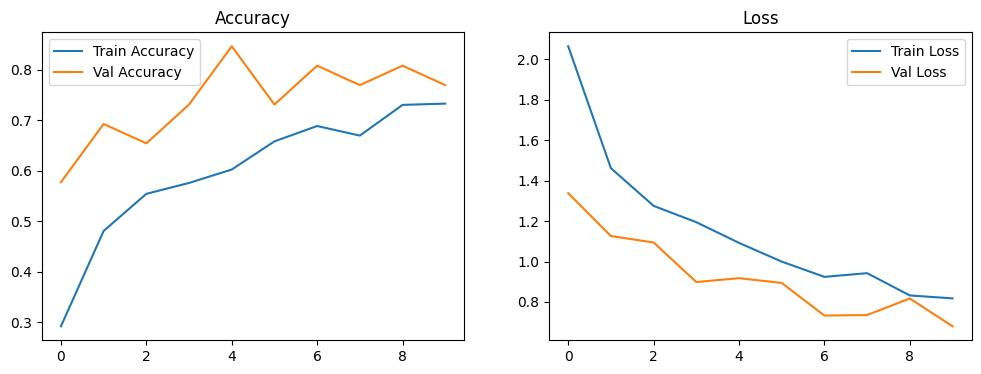

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['accuracy'], label='Train Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_pretrained.history['loss'], label='Train Loss')
plt.plot(history_pretrained.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [34]:
prediction1 = pretrained_model.predict(img_array)


# Output predicted probabilities for each class
print("Predicted probabilities:", prediction)

# Get the predicted class index
predicted_class = np.argmax(prediction)
print("Predicted class index:", predicted_class)

# Optional: Map the index to class names
class_names = list(train_data.class_indices.keys())
print("Predicted class name:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted probabilities: [[1.6854065e-04 1.8974522e-02 9.7929364e-01 2.8527170e-04 1.5188902e-04
  1.6636903e-05 1.1018167e-03 7.6593378e-06]]
Predicted class index: 2
Predicted class name: Hydra


Predict on the Entire Test Set

In [35]:
predictions = custom_model.predict(test_data)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_data.classes

# Map indices to class names
class_names = list(test_data.class_indices.keys())
predicted_class_names = [class_names[i] for i in predicted_classes]

print("Predicted class names:", predicted_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
Predicted class names: ['Yeast', 'Euglena', 'Paramecium', 'Euglena', 'Euglena', 'Paramecium', 'Paramecium', 'Euglena', 'Spherical_bacteria', 'Paramecium', 'Paramecium', 'Paramecium', 'Paramecium', 'Hydra', 'Spherical_bacteria', 'Yeast', 'Rod_bacteria', 'Rod_bacteria', 'Spiral_bacteria', 'Rod_bacteria', 'Spherical_bacteria', 'Paramecium', 'Rod_bacteria', 'Yeast', 'Paramecium', 'Spherical_bacteria']


Visualizing test result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


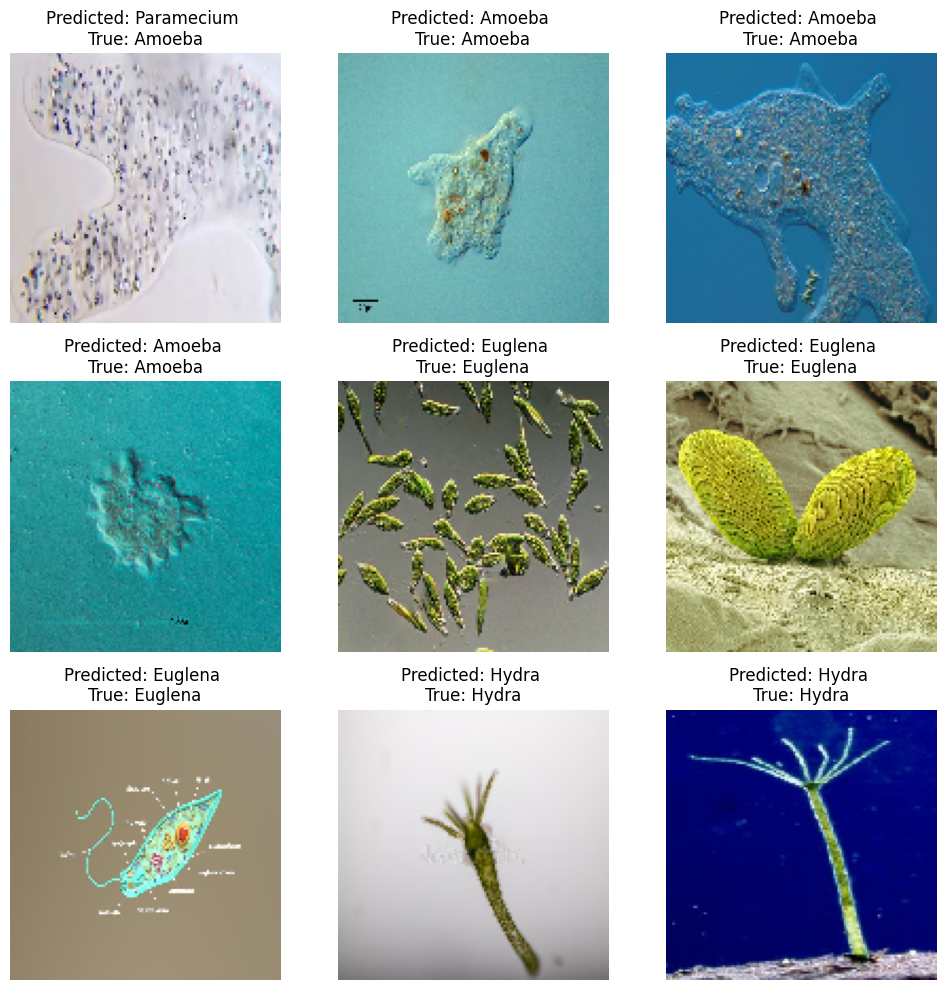

In [37]:
import matplotlib.pyplot as plt

# Get a batch of test data
test_images, test_labels = next(test_data)

# Predict on the batch
predictions = pretrained_model.predict(test_images)

# Plot the images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]} \nTrue: {class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
# Create a DataFrame with predictions and true labels
results_pretrained = pd.DataFrame({
    'True_Label': [class_names[i] for i in true_classes],
    'Predicted_Label': predicted_class_names
})

# Save to CSV
results_pretrained.to_csv('predictions_pretrained.csv', index=False)
print("Predictions saved to predictions_pretrained.csv")

Predictions saved to predictions_pretrained.csv


In [39]:
pretrained_model.save('microorganism_classifier_pretrained.keras')

Compare with Custom Model

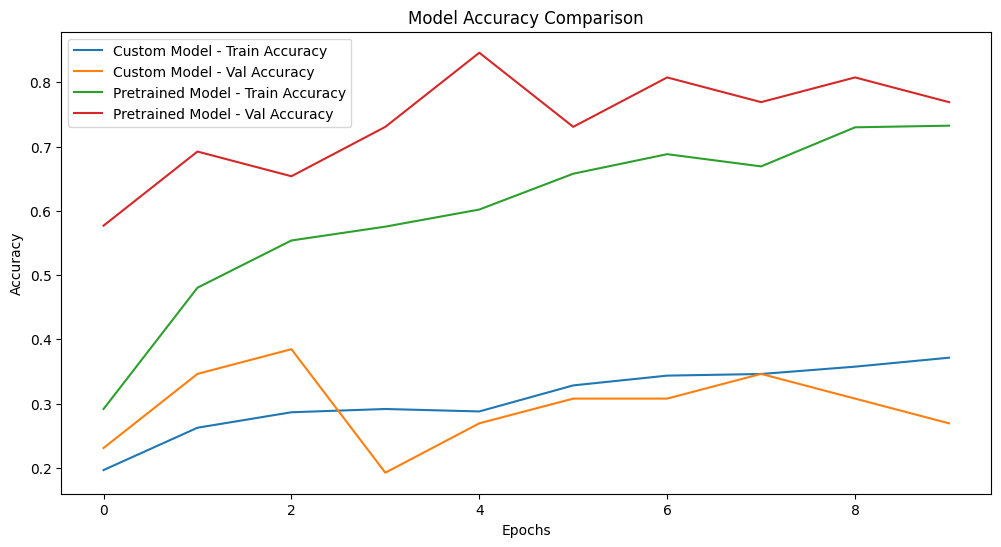

Custom Model Test Accuracy: 0.27
Pretrained Model Test Accuracy: 0.85


In [42]:
# Plot accuracy
plt.figure(figsize=(12, 6))

# Custom Model Accuracy
plt.plot(history.history['accuracy'], label='Custom Model - Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Custom Model - Val Accuracy')

# Pretrained Model Accuracy
plt.plot(history_pretrained.history['accuracy'], label='Pretrained Model - Train Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Pretrained Model - Val Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compare Test Accuracy
print(f"Custom Model Test Accuracy: {test_acc:.2f}")
print(f"Pretrained Model Test Accuracy: {test_acc_pretrained:.2f}")
